# Correlation Matrix

It is used to calculate the correlation between different features.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from utils import get_training_dataset

In [2]:
# Read csv file and import to df
df = get_training_dataset()
df.head()

,typhoon_name,typhoon_year,grid_point_id,wind_speed,track_distance,total_buildings,rainfall_max_6h,rainfall_max_24h,percent_buildings_damaged
0,DURIAN,2006,6301,0.0,510.358125,379.0,0.095833,0.039062,0.0
1,DURIAN,2006,6302,0.0,521.466945,2.0,0.158333,0.101042,0.0
2,DURIAN,2006,6466,0.0,488.030454,38.0,0.033333,0.016146,0.0
3,DURIAN,2006,6467,0.0,499.140454,79.0,0.041667,0.019271,0.0
4,DURIAN,2006,6468,0.0,510.250454,1.0,0.077083,0.043229,0.0


In [3]:
df = df.drop(columns=["grid_point_id", "typhoon_year"])
#df.head()

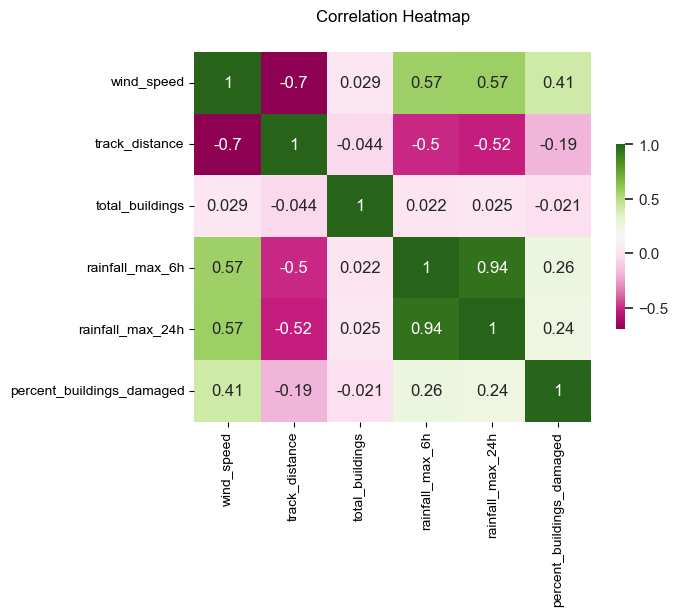

In [4]:
# Estimate correlation matrix

fig, ax = plt.subplots()

corrMatrix = df.corr()

plt.rcParams["figure.figsize"] = (4, 4)

sn.set(font_scale=1)
heatmap = sn.heatmap(
    corrMatrix,
    annot=True,
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 12},
    cmap="PiYG",
)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 12}, pad=22)

plt.show()

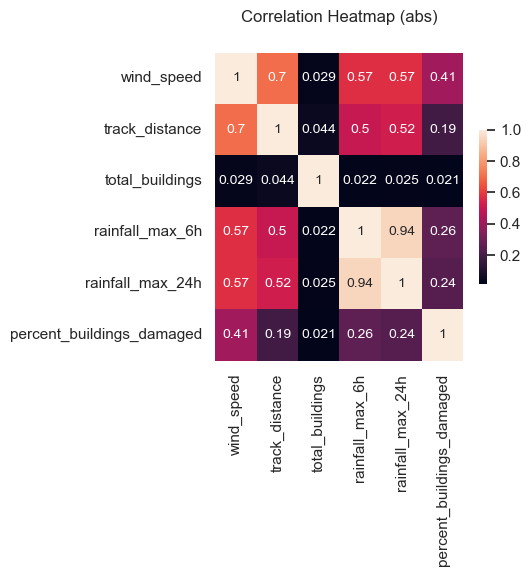

In [5]:
# The absolute value of correlation

fig, ax = plt.subplots()

corrMatrix_abs = df.corr().abs()
# print (corrMatrix)

plt.rcParams["figure.figsize"] = (4, 4)

sn.set(font_scale=1)
heatmap = sn.heatmap(
    corrMatrix_abs,
    annot=True,
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 10},
)
heatmap.set_title(
    "Correlation Heatmap (abs)", fontdict={"fontsize": 12}, pad=22
)

plt.show()

In [6]:
# Print out correlated pairs of features
pair = (
    corrMatrix_abs.where(
        np.triu(np.ones(corrMatrix_abs.shape), k=1).astype(np.bool)
    )
    .stack()
    .sort_values(ascending=True)
)
pairs = pair[pair.gt(0.8)]

if len(pairs) > 0:
    print(pairs)
else:
    print("No correlated features found!")

rainfall_max_6h  rainfall_max_24h    0.943074
dtype: float64


/var/folders/sx/c10hm4fj3glf7mw1_mzwcl700000gn/T/ipykernel_39721/2928569256.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corrMatrix_abs.shape), k=1).astype(np.bool)
